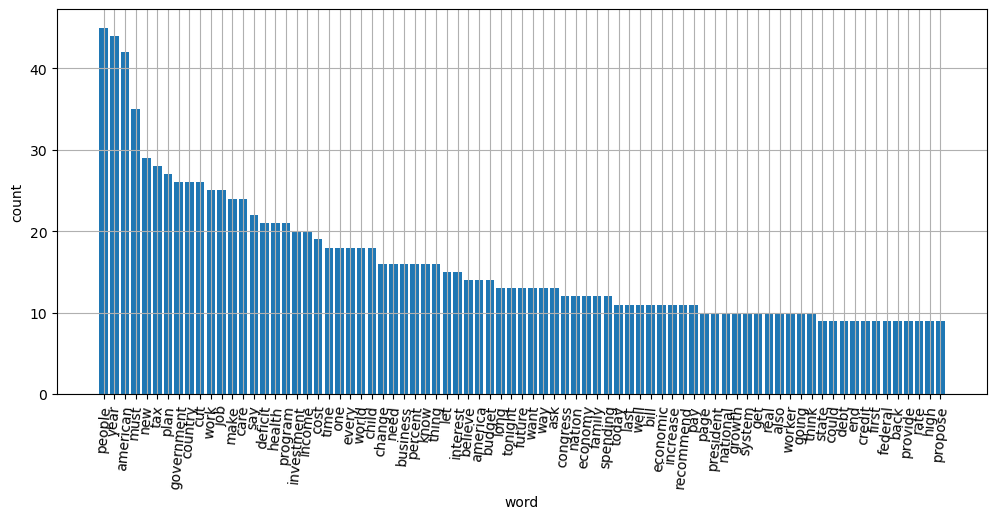

In [68]:
import requests
import json
from bs4 import BeautifulSoup

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from functools import reduce
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


response = requests.get("https://www.govinfo.gov/content/pkg/WCPD-1993-02-22/html/WCPD-1993-02-22-Pg215-2.htm")

data = response.content

soup = BeautifulSoup(data, 'html.parser')

lemma = WordNetLemmatizer()

stopwords = set(stopwords.words("english")) #영어 불용어

#print(soup)

words = []

for line in soup:
    www = re.sub("<.*?>", " ", str(line))
    Words = re.sub("[^a-zA-z]+", " ", str(www))
    WordsToken = word_tokenize(Words.lower())
    WordsTokenStop = [w for w in WordsToken if w not in stopwords]
    WordsTokenStopLemma = [lemma.lemmatize(w) for w in WordsTokenStop]
    words.append(WordsTokenStopLemma)
    
    
WORD = reduce(lambda x,y: x+y, words)
remove_sets = { '[', ']'}

WORD = [ i for i in WORD if i not in remove_sets]
#print(WORD)

count = Counter(WORD)

word_counts = dict()
for tag, counts in count.most_common(80):
    if(len(str(tag)) > 1):
        word_counts[tag] = counts
        
word_counts

sorted_keys4 = sorted(word_counts, key = word_counts.get, reverse = True)
sorted_values4 = sorted(word_counts.values(), reverse = True)

plt.figure(figsize = (12, 5))

plt.bar(range(len(word_counts)), sorted_values4)
plt.xticks(range(len(word_counts)), list(sorted_keys4), rotation = 85)

plt.xlabel('word')
plt.ylabel('count')
plt.grid(visible = True)

plt.show()


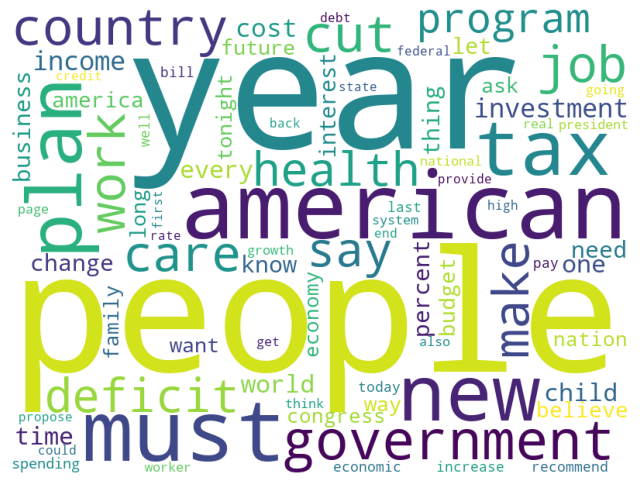

In [69]:
wc = WordCloud(background_color = 'white', width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_counts)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()


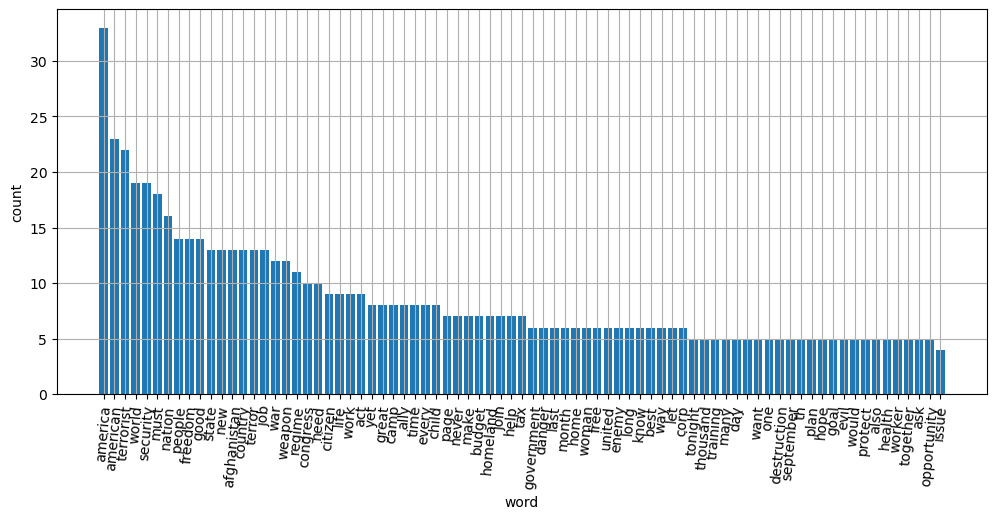

In [70]:
import requests
import json
from bs4 import BeautifulSoup

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from functools import reduce
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


response = requests.get("https://www.govinfo.gov/content/pkg/WCPD-2002-02-04/html/WCPD-2002-02-04-Pg133-3.htm")

data = response.content

soup = BeautifulSoup(data, 'html.parser')

lemma = WordNetLemmatizer()

stopwords = set(stopwords.words("english")) #영어 불용어

#print(soup)

words = []

for line in soup:
    www = re.sub("<.*?>", " ", str(line))
    Words = re.sub("[^a-zA-z]+", " ", str(www))
    WordsToken = word_tokenize(Words.lower())
    WordsTokenStop = [w for w in WordsToken if w not in stopwords]
    WordsTokenStopLemma = [lemma.lemmatize(w) for w in WordsTokenStop]
    words.append(WordsTokenStopLemma)
    
    
WORD = reduce(lambda x,y: x+y, words)
remove_sets = { '[', ']'}

WORD = [ i for i in WORD if i not in remove_sets]
#print(WORD)

count = Counter(WORD)

word_counts = dict()
for tag, counts in count.most_common(80):
    if(len(str(tag)) > 1):
        word_counts[tag] = counts
        
word_counts

sorted_keys4 = sorted(word_counts, key = word_counts.get, reverse = True)
sorted_values4 = sorted(word_counts.values(), reverse = True)

plt.figure(figsize = (12, 5))

plt.bar(range(len(word_counts)), sorted_values4)
plt.xticks(range(len(word_counts)), list(sorted_keys4), rotation = 85)

plt.xlabel('word')
plt.ylabel('count')
plt.grid(visible = True)

plt.show()

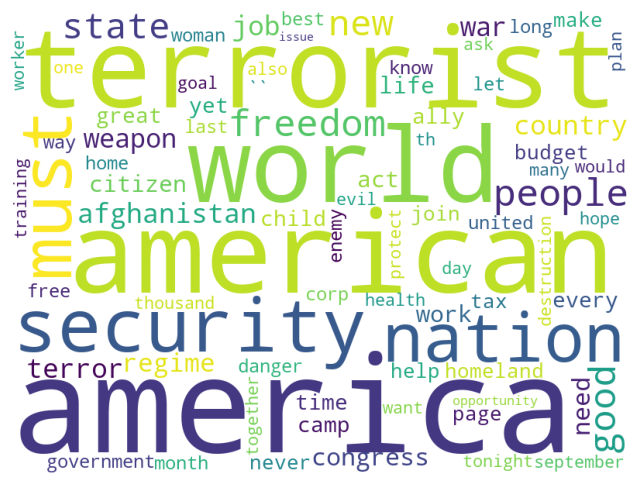

In [64]:
wc = WordCloud(background_color = 'white', width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_counts)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

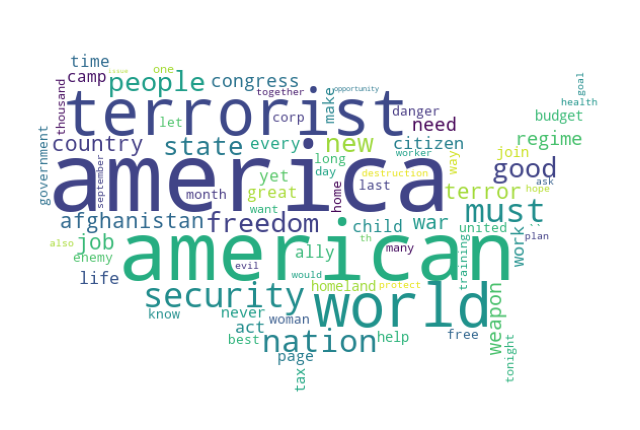

In [71]:
from PIL import *
import numpy as np

cand_mask=np.array(Image.open('/Users/handrakes/bigdata/america.jpg'))


wc = WordCloud(background_color='white', width=800, height=600, mask = cand_mask)
cloud = wc.generate_from_frequencies(word_counts)
plt.figure(figsize=(8,8)) 
plt.imshow(cloud) # 이미지 출력함수 plt.axis('off') # 축과 라벨 이름 제거 
plt.axis('off')
plt.show()